# **Tennis Player Performance Analysis**

### **Project Summary**

This project aims to find out the Greatest Players of All Times through a detailed and comprehensive data analysis. Is the most renowned player necessarily the best player in history? Are there any players with great performance but were not noticed by anyone? Aside from pure statistical analysis, the popularity of the player and comments from others will also be taken into account.

To do this, I need to explore and analyze the dataset from different perspectives. Also, it takes several steps to complete. First, I would need to import and clean the dataset. Next, I would do some manipulations to prepare for data visualizations. Last but not least, I would visualize the data and come up with conclusions.

I analyzed the data from five aspects: the number of grand slams won by each player, the number of grand slams won in each year, the distribution of player's grand slam data, the number of times each player won the grand slam or was the runner-up and the grand slam distributions of the four most famous tennis players.

### **Research Questions**

Who are the Greatest Players of All Times?
- What is the general trend of tennis matches? Does the competition become fiercer over the years or the opposite?
- What is the statistics of each player? Are there any outstanding players? Or most of them are close to average?
- What is the distribution of each player?s performance within his career lifetime?


## **1) Importing Dataset**

In [37]:
# importing packages that I will be using
# dplyr is for manipulating datasets, ggplot2 is for plotting,
# and readr is for importing datasets

library(dplyr)
library(ggplot2)
library(readr)

In order to run the next line each time, one should upload the "tennis.csv" and the "tennis_2.csv" file into the file folder on the left. "tennis.csv" and "tennis_2.csv" can be found in the same folder with this ipynb file.

In [38]:
# importing the dataset

tennis <- read_csv("tennis.csv", col_names = TRUE, col_types = "nccc")

tennis_2 <- read_csv("tennis_2.csv", col_names = TRUE, 
col_types = "ncccccccnccccnnnnnn____nnc____________________________")

## **2) Manipulating and Cleaning Dataset**

I have created several datasets from the original dataset to analyze from different perspectives. I have displayed the first ten rows of the two original datasets and each of the datasets that I got from manipulating the original dataset. 

In [39]:
# the first ten rows of the first dataset
head(tennis_2, 10)

ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,Winner,⋯,LRank,W1,L1,W2,L2,W3,L3,Wsets,Lsets,Comment
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Dosedel S.,⋯,77,6,4,6,2,NA,NA,2,0,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Enqvist T.,⋯,56,6,3,6,3,NA,NA,2,0,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Escude N.,⋯,655,6,7,7,5,6,3,2,1,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Federer R.,⋯,87,6,1,6,4,NA,NA,2,0,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Fromberg R.,⋯,198,7,6,5,7,6,4,2,1,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Gambill J.M.,⋯,105,3,6,7,6,6,4,2,1,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Grosjean S.,⋯,51,6,2,6,1,NA,NA,2,0,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Henman T.,⋯,218,6,4,7,6,NA,NA,2,0,Completed
1,Adelaide,Australian Hardcourt Championships,3/01/2000,International,Outdoor,Hard,1st Round,3,Hewitt L.,⋯,129,6,3,2,6,6,1,2,1,Completed


In [40]:
# the first ten rows of the second dataset
head(tennis, 10)

YEAR,TOURNAMENT,WINNER,RUNNER-UP
<dbl>,<chr>,<chr>,<chr>
2018,French Open,Rafael Nadal,Dominic Thiem
2018,Australian Open,Roger Federer,Marin Cilic
2017,U.S. Open,Rafael Nadal,Kevin Anderson
2017,Wimbledon,Roger Federer,Marin Cilic
2017,French Open,Rafael Nadal,Stanislas Wawrinka
2017,Australian Open,Roger Federer,Rafael Nadal
2016,U.S. Open,Stanislas Wawrinka,Novak Djokovic
2016,Wimbledon,Andy Murray,Milos Raonic
2016,French Open,Novak Djokovic,Andy Murray


### **2.1) Dataset of the Number of Grand Slams Won by Each Player**

In [41]:
# this table contains two columns, the first column is the names of the grand slam winners
# the second column is the number of times being the winner
# only ten rows are being displayed

one <- tennis %>% 
  group_by(WINNER) %>% 
  summarize(count = n()) %>% 
  arrange(desc(count)) %>%
  filter(count > 3)

head(one, 10)

WINNER,count
<chr>,<int>
Roger Federer,20
Rafael Nadal,17
Pete Sampras,14
Novak Djokovic,12
Roy Emerson,12
Bjorn Borg,11
Rod Laver,11
William T. Tilden,10
Andre Agassi,8


### **2.2) Dataset of the Number of Grand Slams Won in Each Year**

In [42]:
# this table contains two columns, the first column is the years of the tournament
# the second column is the number of times there is a recorded winner
# only ten rows are being displayed

two <- tennis %>%
  group_by(YEAR) %>%
  summarize(count = n()) %>%
  arrange(desc(count))

head(two, 10)

YEAR,count
<dbl>,<int>
1977,5
1905,4
1906,4
1907,4
1908,4
1909,4
1910,4
1911,4
1912,4


### **2.3) Dataset of the Distribution of Player's Grand Slam Data**

In [43]:
# this table specifically analyszes the distribution of Roger Federer's grand slam distribution
# it contains two columns, the first column is the ages of winning the grand slam(s)
# the second column is the number of times being the winner in that age
# in the next section, I would also analyze the distribution of other tennis players
# only ten rows are being displayed

three <- tennis %>% 
  mutate("birth_year" = 1981) %>%
  filter(WINNER == "Roger Federer") %>%
  mutate("age" = YEAR - birth_year) %>%
  group_by(age) %>%
  summarize(count = n()) %>%
  rbind(data.frame(age = c(17, 18, 19, 20, 21, 30, 32, 33, 34, 35),
                   count = rep(0, 10))) %>%
  arrange(age)

head(three, 10)

age,count
<dbl>,<dbl>
17,0
18,0
19,0
20,0
21,0
22,1
23,3
24,2
25,3


### **2.4) Dataset of the Grand Slam Distributions of the Four Famous Tennis Players**

In [44]:
# this table contains four columns, the first column is the years of the tounraments
# the second column is the name of the tournaments
# the third column is the winner in each tournament each year
# the fourth column is the runner-up in each tournament each year
# only ten rows are being displayed

temp3 <- tennis %>%
  filter(WINNER == "Roger Federer") 
temp4 <- tennis %>%
  filter(WINNER == "Rafael Nadal")
temp5 <- tennis %>%
  filter(WINNER == "Pete Sampras")
temp6 <- tennis %>%
  filter(WINNER == "Novak Djokovic")
five <- rbind(temp3, temp4, temp5, temp6)

head(five, 10)

YEAR,TOURNAMENT,WINNER,RUNNER-UP
<dbl>,<chr>,<chr>,<chr>
2018,Australian Open,Roger Federer,Marin Cilic
2017,Wimbledon,Roger Federer,Marin Cilic
2017,Australian Open,Roger Federer,Rafael Nadal
2012,Wimbledon,Roger Federer,Andy Murray
2010,Australian Open,Roger Federer,Andy Murray
2009,Wimbledon,Roger Federer,Andy Roddick
2009,French Open,Roger Federer,Robin Soderling
2008,U.S. Open,Roger Federer,Andy Murray
2007,U.S. Open,Roger Federer,Novak Djokovic


### **2.5) Number of Matches Won by Each Player on Different Types of Surface**

In [45]:
# This step is to continue clean the dataset and keep only the columns that I need

sec_cleaned <- select(tennis_2, Tournament, Surface, Winner)

# This step is to create four sub-datasets where each of them belongs to a type of surface
# The first column is the name of the tournament, the second column is the type of surface
# The third column is the name of the winner

sec_1 <- sec_cleaned %>%
  filter(Surface == "Hard")

sec_2 <- sec_cleaned %>%
  filter(Surface == "Clay")

sec_3 <- sec_cleaned %>%
  filter(Surface == "Carpet")

sec_4 <- sec_cleaned %>%
  filter(Surface == "Grass")

head(sec_1, 10)

Tournament,Surface,Winner
<chr>,<chr>,<chr>
Australian Hardcourt Championships,Hard,Dosedel S.
Australian Hardcourt Championships,Hard,Enqvist T.
Australian Hardcourt Championships,Hard,Escude N.
Australian Hardcourt Championships,Hard,Federer R.
Australian Hardcourt Championships,Hard,Fromberg R.
Australian Hardcourt Championships,Hard,Gambill J.M.
Australian Hardcourt Championships,Hard,Grosjean S.
Australian Hardcourt Championships,Hard,Henman T.
Australian Hardcourt Championships,Hard,Hewitt L.


### **2.6) Number of Matches Won by Each Player in Four Major Tournaments**

In [46]:
# This step is to create four sub-datasets where each of them belongs to a type of tournament
# The first column is the name of the tournament, the second column is the type of surface
# The third column is the name of the winner

sec_1_tour <- sec_cleaned %>%
  filter(Tournament == "Australian Open")

sec_2_tour <- sec_cleaned %>%
  filter(Tournament == "French Open")

sec_3_tour <- sec_cleaned %>%
  filter(Tournament == "US Open")

sec_4_tour <- sec_cleaned %>%
  filter(Tournament == "Wimbledon")

head(sec_1_tour, 10)

Tournament,Surface,Winner
<chr>,<chr>,<chr>
Australian Open,Hard,Agassi A.
Australian Open,Hard,Alami K.
Australian Open,Hard,Arazi H.
Australian Open,Hard,Behrend T.
Australian Open,Hard,Bjorkman J.
Australian Open,Hard,Black W.
Australian Open,Hard,Clavet F.
Australian Open,Hard,Clement A.
Australian Open,Hard,Corretja A.


### **2.7) Dataset of the Number of Times Each Player Won the Grand Slam or Was the Runner-Up**

In [47]:
# this table contains two columns, the first column is the names of the tennis players
# the second column is the number of times being the winner or the runner-up
# only ten rows are being displayed

temp <- tennis %>%
  group_by(WINNER) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

temp2 <- tennis %>%
  mutate(WINNER = `RUNNER-UP`) %>%
  mutate(`RUNNER-UP` = NULL) %>%
  group_by(WINNER) %>%
  summarise(count = n()) %>%
  arrange(desc(count))
  
four <- rbind(temp, temp2) %>%
  group_by(WINNER) %>%
  summarize(count = sum(count)) %>%
  arrange(desc(count)) %>%
  filter(count > 7)

head(four, 10)

WINNER,count
<chr>,<int>
Roger Federer,30
Rafael Nadal,24
Novak Djokovic,21
Ivan Lendl,19
Pete Sampras,18
Rod Laver,17
Bjorn Borg,16
Ken Rosewall,16
Andre Agassi,15


## **3) Data Analysis and Plotting**

### **3.1.1) Point Plot of the Number of Grand Slams Won by Each Player**

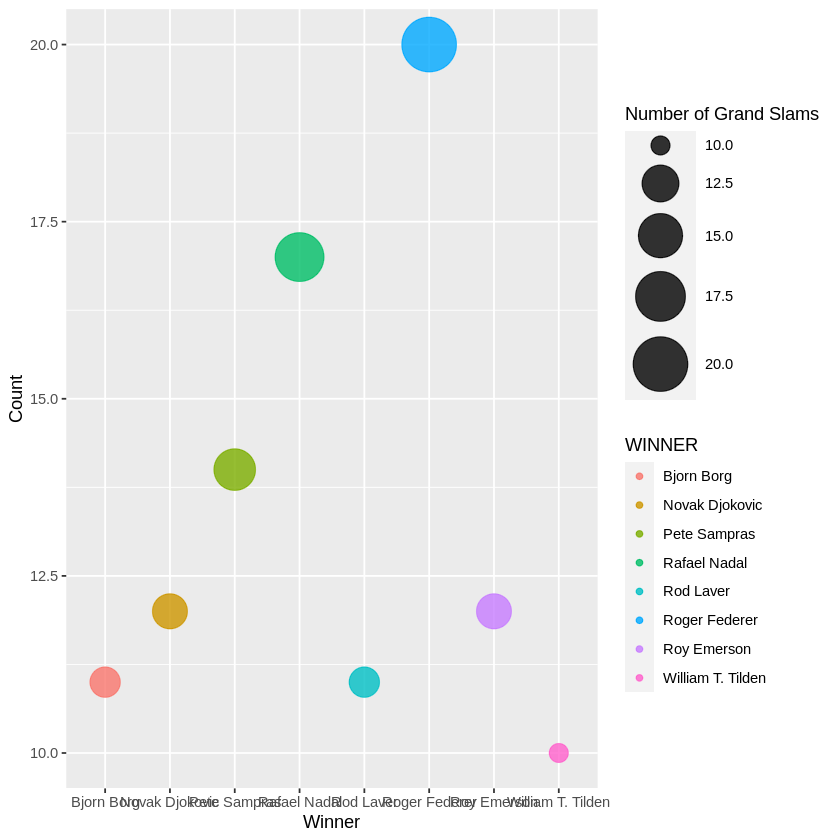

In [48]:
# I took the dataset from 2.1) and filter out all the players who have won less than 10 times
# since containing too many data points would make the plot messy
# and I represented each player as a point with different areas on the graph

one2 <- one %>%
  filter(count > 9)

ggplot(one2, aes(x = WINNER, y = count, size = count, color = WINNER)) + 
  geom_point(alpha = 0.8) + 
  scale_size(range = c(5, 15), name="Number of Grand Slams") + 
  xlab("Winner") + 
  ylab("Count")

Although I took out all the players that have won less than 10 times to make the graph cleaner, the counts of the top three players are still very outstanding. From the graph we can see that the player with the highest count corresponds to Roger Federer, followed by Rafael Nadal, and Pete Sampras. The number of times winning is 20, 17, and 14 respectively. Followed by them are Novak Djokovic and Rod Laver, both of whom have won 12 times. These five players together have won 75 grand slams in total, which is fifteen percent of the total grand slams recorded in this dataset. Admittedly, their performances are very outstanding compared to other players.

### **3.1.2) Circular Bar Plot of the Number of Grand Slams Won by Each Player**

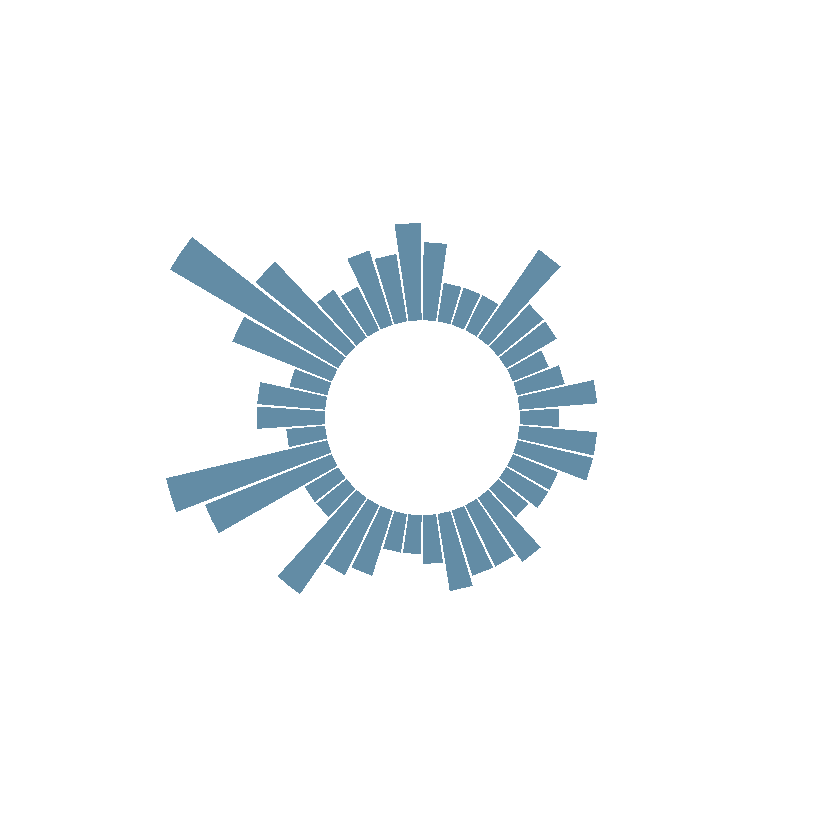

In [49]:
# I took the dataset from 2.1) without filtering to better showcase the winning data of each player
# each player is represented by a bar radiating from the circle

ggplot(one, aes(x = WINNER, y = count)) + 
  geom_bar(stat = "identity", fill=alpha("#3D708F", 0.8)) + 
  ylim(-10,32) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2,4), "cm")) +
  coord_polar(start = 0)

Aside from the point plot, I also visualized this data using a circular bar plot, which makes the difference between each player more intuitive. As we can tell from the plot, there are five bars (almost all on the left side) that are much higher than the others.
I have included another circular bar plot in section 3.4.1, more conclusions would be reached by comparing this plot and the plot in section 3.4.1. 

### **3.2) Line plot of the Number of Grand Slams Won in Each Year**

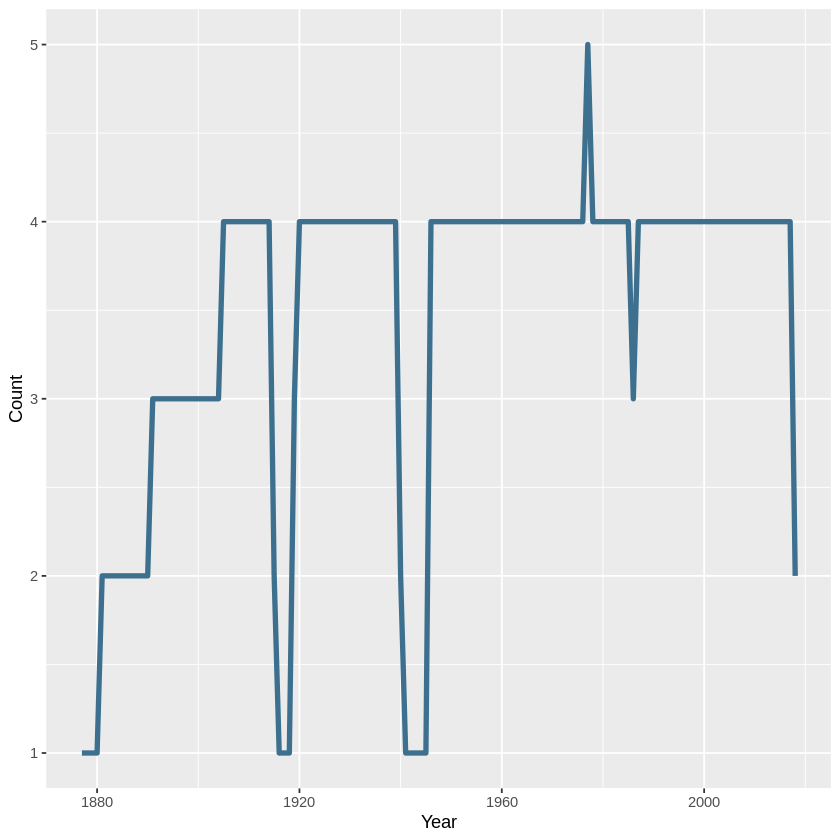

In [50]:
# I took the dataset from 2.2) and graph the line plot
# the x-axis represents the year and the y-axis is the count of winners in each year

ggplot(two, aes(x = YEAR, y = count)) + 
  geom_line(color = "#3D708F", size = 1.5) + 
  ylim(c(1,5)) +
  xlab("Year") + 
  ylab("Count")

Theoretically, there should be four winners each year. Yet from this graph we can see that during some years there are only one, two, or three champions, and for one year there are five champions. This means that there are some limitations to this dataset. For some years there might be missing champions. The data is not complete.

### **3.3) Line plot of the Distribution of Player's Grand Slam Data**

`geom_smooth()` using formula 'y ~ x'



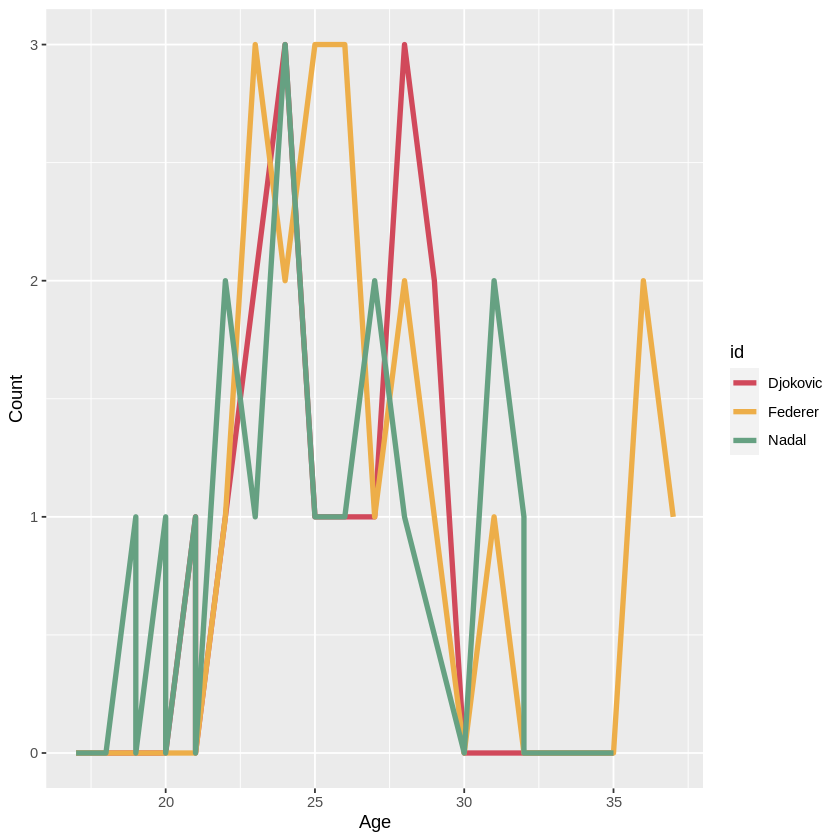

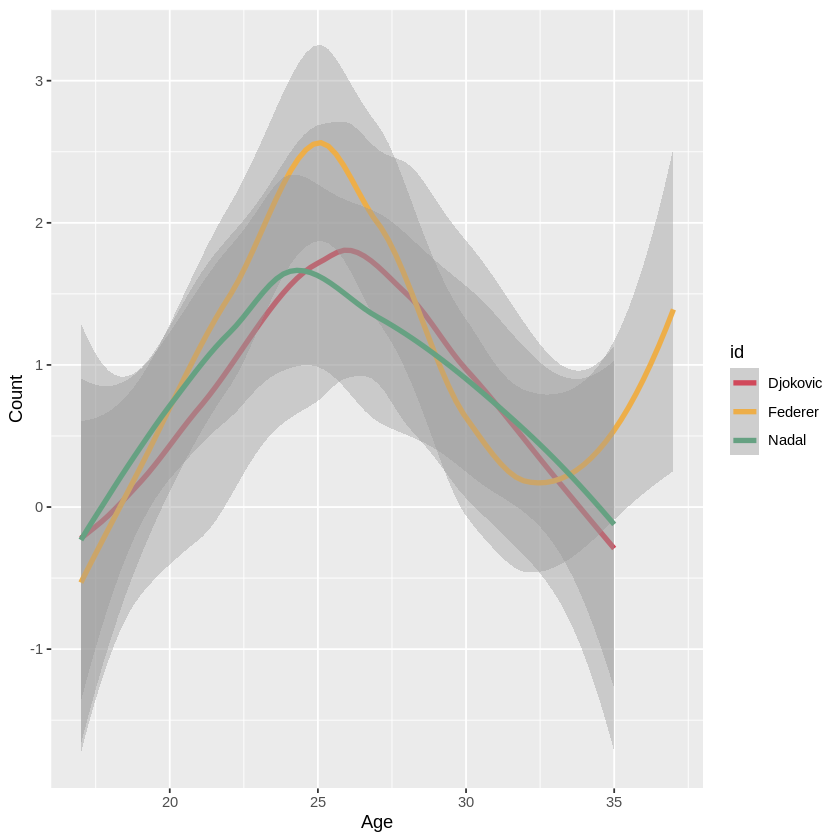

In [51]:
# I took the dataset from 2.3) and generated another two datasets corresponding to Nadal and Djokovic
# then, I combined these two datasets with the dataset of Federer and generated two plots

temp7 <- tennis %>% 
  mutate("birth_year" = 1986) %>%
  filter(WINNER == "Rafael Nadal") %>%
  mutate("age" = YEAR - birth_year) %>%
  group_by(age) %>%
  summarize(count = n()) %>%
  rbind(data.frame(age = c(17, 18, 19, 20, 21, 30, 32, 33, 34, 35),
                   count = rep(0, 10))) %>%
  arrange(age) %>%
  mutate("id" = "Nadal")

temp8 <- tennis %>% 
  mutate("birth_year" = 1987) %>%
  filter(WINNER == "Novak Djokovic") %>%
  mutate("age" = YEAR - birth_year) %>%
  group_by(age) %>%
  summarize(count = n()) %>%
  rbind(data.frame(age = c(17, 18, 19, 20, 21, 30, 32, 33, 34, 35),
                   count = rep(0, 10))) %>%
  arrange(age) %>%
  mutate("id" = "Djokovic")
  
temp9 <- three %>%
  mutate("id" = "Federer")
three1 <- rbind(temp7, temp8, temp9)

ggplot(three1, aes(x = age, y = count, color = id)) + 
  geom_line(size = 1.5) + 
  xlab("Age") + 
  ylab("Count") + 
  scale_color_manual(values = c("#d1495b", "#edae49", "#66a182")) + 
  guides(fill=guide_legend(title="Tennis Player"))

ggplot(three1, aes(x = age, y = count, color = id)) + 
  geom_smooth(method = "loess", size = 1.5) + 
  xlab("Age") + 
  ylab("Count") + 
  scale_color_manual(values = c("#d1495b", "#edae49", "#66a182")) + 
  guides(fill=guide_legend(title="Tennis Player"))

It might not be very intuitive to see from the first plot but from the second plot, we can see that among the three players, Roger Federer has a slightly better performance. Rafael Nadal and Novak Djokovic have similar performance curves, but Nadal's curve seems to be more shifted to the right, and Djokovic's curve is more shifted to the right. 
Besides, the curves of Nadal and Djokovic both follow an approximately normal (Gaussian) distribution, with a maximum point at around age 24 to 27, whereas Federer's curve follows a more bizarre pattern, with the first maximum point at around age 25 and the minimum point at around age 32, then rising again to another maximum at age 38.

### **3.4) Violin Plot of the Grand Slam Distributions of the Six Famous Tennis Players**

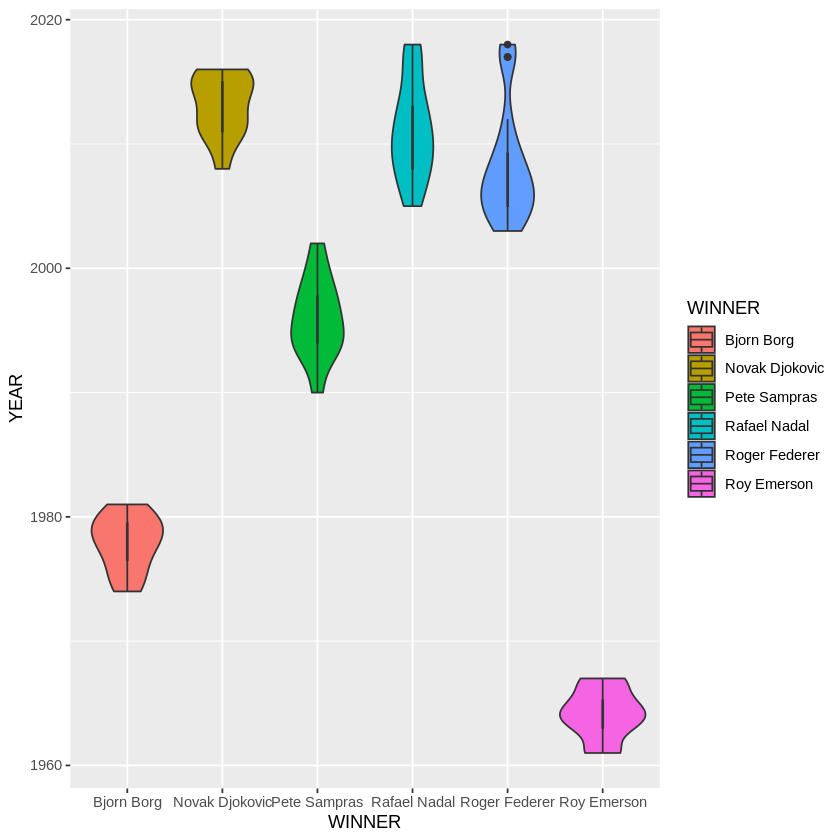

In [52]:
temp10 <- tennis %>%
  filter(WINNER == "Bjorn Borg") 
temp11 <- tennis %>%
  filter(WINNER == "Roy Emerson")
five1 <- rbind(five, temp10, temp11)

ggplot(five1, aes(x = WINNER, y = YEAR, fill = WINNER)) + 
  geom_violin() + 
  geom_boxplot(width=0.01)

This plot visualizes the distribution of winning grand slams of each individual player. I have selected the six players with the most outstanding performances. As we can tell from the graph, the distribution of most players follows a roughly normal (Gaussian) distribution, since between age 23 to 28 are the golden time for players to get the best scores. Before 23, players do not have time to gain enough tactical experience. And after 28, players' physical strengths start to decline. From the graph, we can see that Pete Sampras, Rafael Nadal, Bjorn Borg, and Roy Emerson all follow this pattern. Yet surprisingly, the distribution of Novak Djokovic and Roger Federer's curves do not quite follow this pattern. It seems like that Djokovic's winning rate grows with his age, and just started to decline in the year 2017, but the trend is not obvious since the data only records matches until the year 2018. Federer's curve is more bizarre. It looks like two normal distributions connecting each other, with a pit in the middle, and his curve seems to be growing in a rather steady trend, which makes his future game anticipating, and the curve is definitely worth investigating. 

### **3.5) Number of Matches Won by Each Player on Different Types of Surface**

In [53]:
sec_1_federer <- sec_1 %>% filter(Winner == "Federer R.") %>% nrow()
sec_2_federer <- sec_2 %>% filter(Winner == "Federer R.") %>% nrow()
sec_3_federer <- sec_3 %>% filter(Winner == "Federer R.") %>% nrow()
sec_4_federer <- sec_4 %>% filter(Winner == "Federer R.") %>% nrow()
federer <- data.frame("Name" = "Federer",
                      "Type" = c("Hard", "Clay", "Carpet", "Grass"), 
                      "Count" = c(sec_1_federer, sec_2_federer, sec_3_federer, 
                                  sec_4_federer))

sec_1_nadal <- sec_1 %>% filter(Winner == "Nadal R.") %>% nrow()
sec_2_nadal <- sec_2 %>% filter(Winner == "Nadal R.") %>% nrow()
sec_3_nadal <- sec_3 %>% filter(Winner == "Nadal R.") %>% nrow()
sec_4_nadal <- sec_4 %>% filter(Winner == "Nadal R.") %>% nrow()
nadal <- data.frame("Name" = "Nadal",
                    "Type" = c("Hard", "Clay", "Carpet", "Grass"), 
                    "Count" = c(sec_1_nadal, sec_2_nadal, sec_3_nadal, 
                                sec_4_nadal))

sec_1_djokovic <- sec_1 %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_2_djokovic <- sec_2 %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_3_djokovic <- sec_3 %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_4_djokovic <- sec_4 %>% filter(Winner == "Djokovic N.") %>% nrow()
djokovic <- data.frame("Name" = "Djokovic",
                       "Type" = c("Hard", "Clay", "Carpet", "Grass"), 
                       "Count" = c(sec_1_djokovic, sec_2_djokovic, sec_3_djokovic, 
                                   sec_4_djokovic))

sec_1_sampras <- sec_1 %>% filter(Winner == "Sampras P.") %>% nrow()
sec_2_sampras <- sec_2 %>% filter(Winner == "Sampras P.") %>% nrow()
sec_3_sampras <- sec_3 %>% filter(Winner == "Sampras P.") %>% nrow()
sec_4_sampras <- sec_4 %>% filter(Winner == "Sampras P.") %>% nrow()
sampras <- data.frame("Name" = "Sampras",
                      "Type" = c("Hard", "Clay", "Carpet", "Grass"), 
                      "Count" = c(sec_1_sampras, sec_2_sampras, sec_3_sampras,
                                  sec_4_sampras))

sec_1_murray <- sec_1 %>% filter(Winner == "Murray A.") %>% nrow()
sec_2_murray <- sec_2 %>% filter(Winner == "Murray A.") %>% nrow()
sec_3_murray <- sec_3 %>% filter(Winner == "Murray A.") %>% nrow()
sec_4_murray <- sec_4 %>% filter(Winner == "Murray A.") %>% nrow()
murray <- data.frame("Name" = "Murray",
                     "Type" = c("Hard", "Clay", "Carpet", "Grass"), 
                     "Count" = c(sec_1_murray, sec_2_murray, sec_3_murray, 
                                 sec_4_murray))

sec_joined <- rbind(federer, nadal, djokovic, sampras, murray)

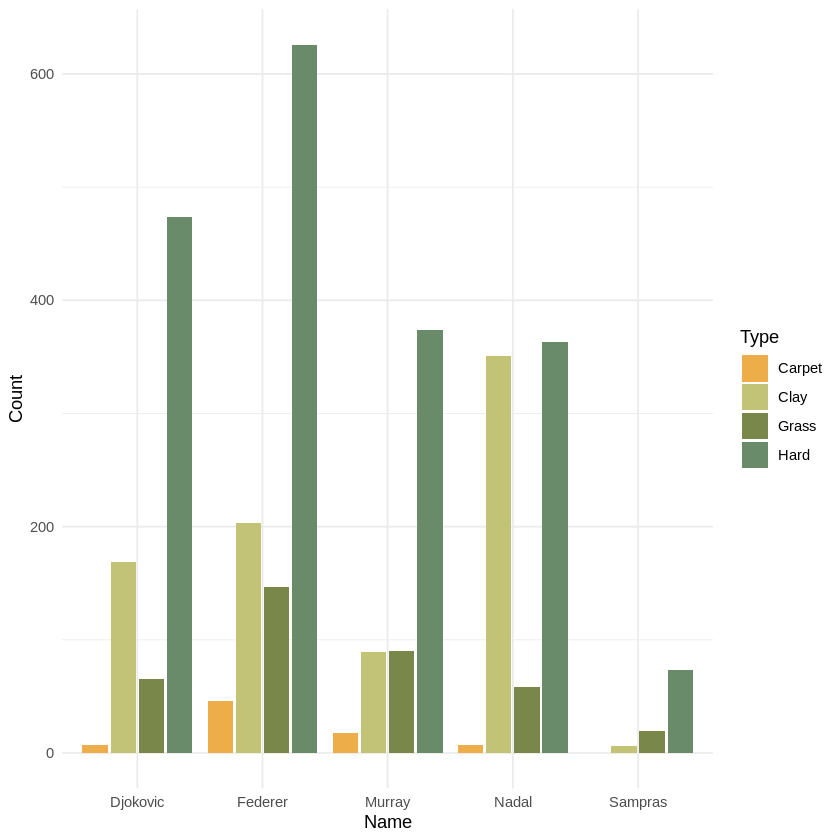

In [54]:
ggplot(sec_joined, aes(x = Name, y = Count, fill = Type)) + 
  geom_bar(stat = "identity", position = "dodge2") + 
  scale_fill_manual(values = c("#edae49", "#c2c377", "#79874a", "darkseagreen4")) + 
  theme_minimal()

From the plot, we can see that each player has different types of the court they are good at. There are four types of courts that are mainly used in tournaments worldwide. Clay courts are traditionally used in the French Open. These courts characteristically have a slower game and give balls a higher bounce. They tend to favor baseline players. The grass is the fastest type of court because of its low bounce capacity. This means that players with stronger serve-and-volley skills will generally perform better. The grass court is the signature of Wimbledon. Hard courts can range from faster to slower speeds depending on the quantity and size of sand mixed into the paint coating. An acrylic hard court is used in the US Open and a synthetic for the Australian Open. Carpet courts are removable tennis court surfaces. In general, carpeted courts make for a fast game.

Comparing and contrasting the win records of the five players, we can see that Federer has the best performance on the carpet court. As for clay courts, Nadal far exceeds other players, which shows that he is better at strength, and he is a good baseline player. Federer and Djokovic have a similar win rate with each other, followed by Murray and Sampras. As for the grass court, Federer has outperformed the other players. Since grass is the fastest type of court, it proves that Federer is better at serve-and-volley skills and has better flexibility and agility. From this data, it seems like hard courts are the most used court in the tournaments. Federer is also better at this type of court compared to other players. It makes sense since hard courts also have fast speeds compared to clay and grass courts. This favors players that have better mobility and agility, but baseline players can also take advantage of this type of court. 

Admittedly, there might be a limitation to this dataset. Djokovic, Federer, Murray, and Nadal are players of our generation, yet Pete Sampras is a player from decades ago. Therefore, this dataset may not record all the matches that he has been played, resulting in a low count of winning. Therefore, this data is not as representative compared to the other players that I have included in this bar plot.

### **3.6) Number of Matches Won by Each Player in Four Major Tournaments**

In [55]:
sec_1_federer_tour <- sec_1_tour %>% filter(Winner == "Federer R.") %>% nrow()
sec_2_federer_tour <- sec_2_tour %>% filter(Winner == "Federer R.") %>% nrow()
sec_3_federer_tour <- sec_3_tour %>% filter(Winner == "Federer R.") %>% nrow()
sec_4_federer_tour <- sec_4_tour %>% filter(Winner == "Federer R.") %>% nrow()
federer_tour <- data.frame("Name" = "Federer",
                           "Type" = c("Australian Open", "French Open", 
                                      "US Open", "Wimbledon"), 
                           "Count" = c(sec_1_federer_tour, sec_2_federer_tour,
                                       sec_3_federer_tour, sec_4_federer_tour))

sec_1_nadal_tour <- sec_1_tour %>% filter(Winner == "Nadal R.") %>% nrow()
sec_2_nadal_tour <- sec_2_tour %>% filter(Winner == "Nadal R.") %>% nrow()
sec_3_nadal_tour <- sec_3_tour %>% filter(Winner == "Nadal R.") %>% nrow()
sec_4_nadal_tour <- sec_4_tour %>% filter(Winner == "Nadal R.") %>% nrow()
nadal_tour <- data.frame("Name" = "Nadal",
                         "Type" = c("Australian Open", "French Open", 
                                    "US Open", "Wimbledon"), 
                         "Count" = c(sec_1_nadal_tour, sec_2_nadal_tour, 
                                     sec_3_nadal_tour, sec_4_nadal_tour))

sec_1_djokovic_tour <- sec_1_tour %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_2_djokovic_tour <- sec_2_tour %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_3_djokovic_tour <- sec_3_tour %>% filter(Winner == "Djokovic N.") %>% nrow()
sec_4_djokovic_tour <- sec_4_tour %>% filter(Winner == "Djokovic N.") %>% nrow()
djokovic_tour <- data.frame("Name" = "Djokovic",
                            "Type" = c("Australian Open", "French Open", 
                                       "US Open", "Wimbledon"), 
                            "Count" = c(sec_1_djokovic_tour, sec_2_djokovic_tour, 
                                        sec_3_djokovic_tour, sec_4_djokovic_tour))

sec_1_sampras_tour <- sec_1_tour %>% filter(Winner == "Sampras P.") %>% nrow()
sec_2_sampras_tour <- sec_2_tour %>% filter(Winner == "Sampras P.") %>% nrow()
sec_3_sampras_tour <- sec_3_tour %>% filter(Winner == "Sampras P.") %>% nrow()
sec_4_sampras_tour <- sec_4_tour %>% filter(Winner == "Sampras P.") %>% nrow()
sampras_tour <- data.frame("Name" = "Sampras",
                           "Type" = c("Australian Open", "French Open", 
                                      "US Open", "Wimbledon"), 
                           "Count" = c(sec_1_sampras_tour, sec_2_sampras_tour, 
                                       sec_3_sampras_tour, sec_4_sampras_tour))

sec_1_murray_tour <- sec_1_tour %>% filter(Winner == "Murray A.") %>% nrow()
sec_2_murray_tour <- sec_2_tour %>% filter(Winner == "Murray A.") %>% nrow()
sec_3_murray_tour <- sec_3_tour %>% filter(Winner == "Murray A.") %>% nrow()
sec_4_murray_tour <- sec_4_tour %>% filter(Winner == "Murray A.") %>% nrow()
murray_tour <- data.frame("Name" = "Murray",
                          "Type" = c("Australian Open", "French Open", 
                                     "US Open", "Wimbledon"), 
                          "Count" = c(sec_1_murray_tour, sec_2_murray_tour, 
                                      sec_3_murray_tour, sec_4_murray_tour))

sec_joined_tour <- rbind(federer_tour, nadal_tour, djokovic_tour, sampras_tour, murray_tour)

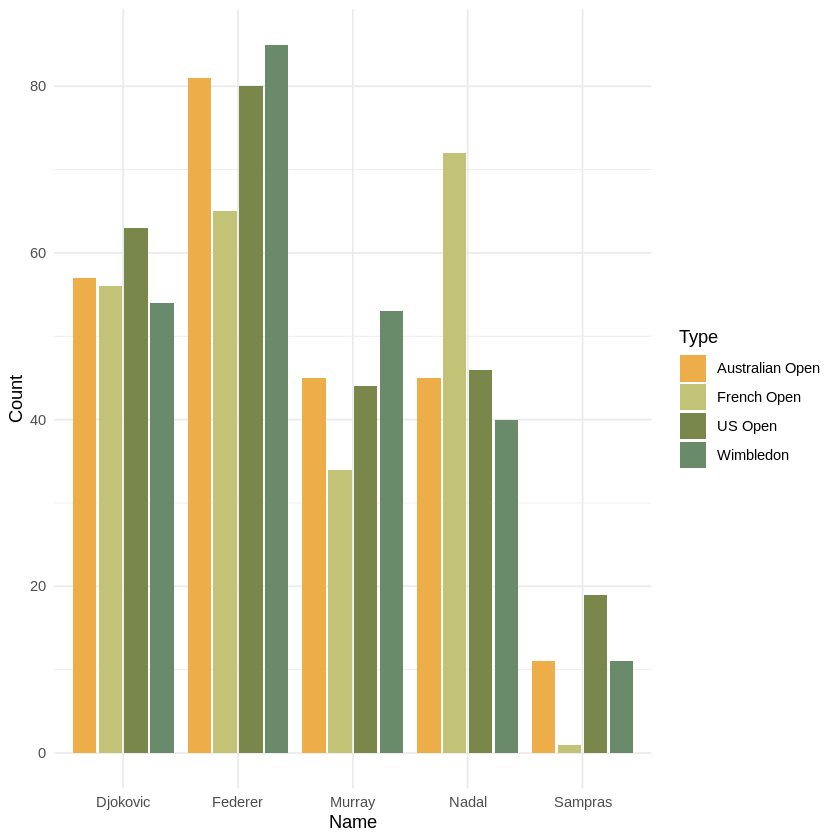

In [56]:
ggplot(sec_joined_tour, aes(x = Name, y = Count, fill = Type)) + 
  geom_bar(stat = "identity", position = "dodge2") + 
  scale_fill_manual(values = c("#edae49", "#c2c377", "#79874a", "darkseagreen4")) + 
  theme_minimal()

The Australian Open is the first Grand Slam event of the year. The tournament is held in Melbourne over two weeks in mid-January. The French Open, also known as Roland Garros, is a two-week event that takes place towards the end of May in Paris, France. This tournament is the only major championship to utilize the advantage set to determine the winner of the match, and the only one played exclusively on outdoor clay court surfaces. Wimbledon is the oldest tennis championship in the world, commonly referred to as ?The Championships.?Wimbledon takes place in late June/early July and is the only major tournament since 1988 to take place on a grass court. Last but not least, the US Open takes place on the last Monday of August, stretching over two weeks. This tournament is played on hard courts. The US Open is the only major tournament to use the 12-point tiebreak scoring system.

We can see the data from this graph correspond to the conclusion that we have reached from the last graph: Nadal won more times than others in the French Open, which uses clay courts. Federer has a good performance in every major tournament except the French Open since he is good at the carpet, grass, and hard courts. Compared to the others, Djokovic seems to have the most stable performances in each type of tournament, unlike Nadal, who has a great advantage in French Open. Both Murray and Sampras do not perform very well on French Open, as well as Federer.

We are able to find a pattern and group players into three different types by taking a closer look at this graph. We can see that the winning rate distribution of Federer, Murray, and Sampras looks similar to each other. They are both good at all the other courts aside from the clay court, so the three of them fall into the same category. On the opposite side, Nadal is good at clay courts and performs better on clay courts than any other types of courts. Therefore, players like Nadal fall into another category. Lastly, Djokovic has stable performance in every type of tournament. So, players like Djokovic that perform equally well on any type of courts and any type of tournaments fall into the third category.

### **3.7) Circular Bar plot of the Number of Times Each Player Won the Grand Slam or Was the Runner-Up**

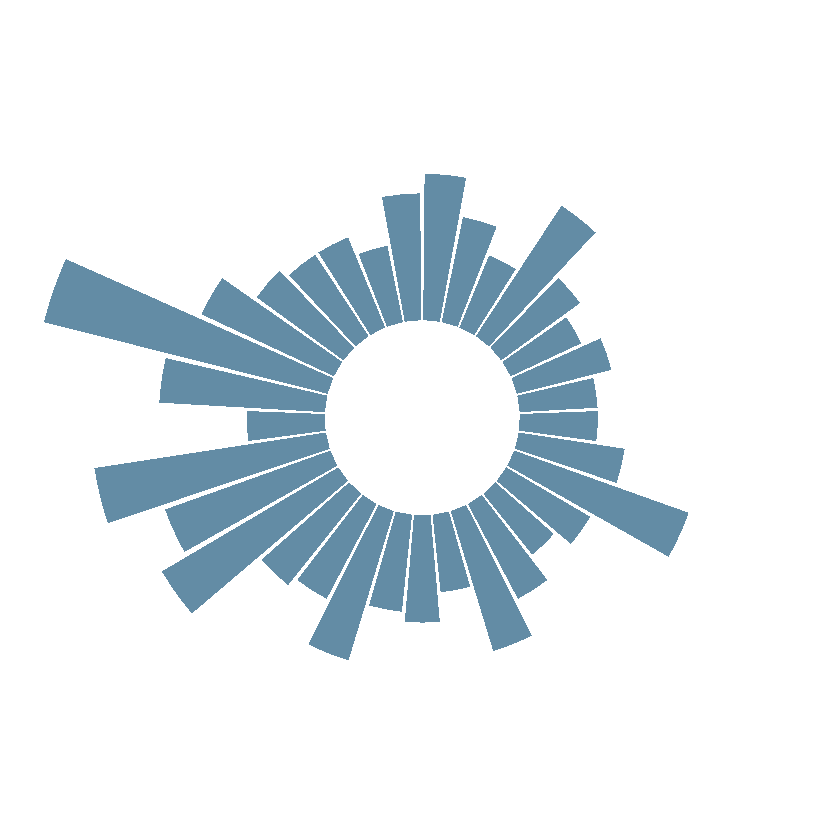

In [57]:
# I took the dataset from 2.4) and generated a circular bar plot
# and compare and contrast with the other circular bar plot 

ggplot(four, aes(x = WINNER, y = count)) + 
  geom_bar(stat = "identity", fill=alpha("#3D708F", 0.8)) + 
  ylim(-10,32) +
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-2,4), "cm")) +
  coord_polar(start = 0)

By comparing this circular bar plot with the one from section 3.1.2, we can notice that the outstanding bars are nearly the same. The first five highest bars correspond to Roger Federer, Rafael Nadal, Novak Djokovic, Ivan Lendl, and Pete Sampras. And the counts are 30, 24, 21, 19, and 18 respectively. They completely outperform the other players in terms of the number of grand slams and the number of being the runner-up for the tournaments, since more than eighty percent of the players have a count below 15. 

## **4) Limitations**

*  There might be missing values in the dataset. For some years, not all the champions were recorded.
*  There are limited features in this dataset. The whole dataset only contains four columns. Therefore the information we can extract from this dataset is very limited. 
*  The size of this data is not very large. The data only contains the four major tournaments from 1877 to 2018. Although it seems to be a very long period, yet the number of tournaments and matches recorded is limited.



## **5) Summary**

Through the data analysis from five different perspectives, we have gained an understanding of the general trend of the tennis tournaments, the distribution of players' performances, and the differences between each player's performance. 

By looking at each result, it is not hard to reach the conclusion that Roger Federer and Rafael Nadal are definitely the two most outstanding tennis players among all the other tennis players. Novak Djokovic and Pete Sampras are very noteworthy as well, especially from the violin plot we can see that there is still more growing space for Djokovic in the future. What is also noteworthy is that among the first four outstanding tennis players, Pete Sampras is the only player that is not of our generation. This leads to the conclusion that the competition indeed has become more fierce during recent decades. 

Admittedly, there are some limitations to this dataset, such as the size of the data is not very large, and there might be some missing data that could impair our decision, but in general, the dataset is quite trustworthy. By just looking at the dataset and by conducting exploratory data analysis, I have examined that there are little flaws and mistakes in this dataset, so the conclusion should be rather accurate and trustworthy. 